Home Stay Data Analysis and price prediction

Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.pandas.set_option('display.max_columns',None)

Reading the excel file

In [4]:
data = pd.read_excel('Homestays_Data.xlsx')

In [5]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,t,t,NaN,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
data.shape

(74111, 29)

In [7]:
data["host_since"].max()

Timestamp('2017-10-04 00:00:00')

In [8]:
data["host_since"].min()

Timestamp('2008-03-03 00:00:00')

Converting "host_since" column into datetime format

In [9]:
data["host_since"] = pd.to_datetime(data["host_since"])

Saving the current time to cur_date using datetime

In [10]:
cur_date = datetime.now()

In [11]:
cur_date

datetime.datetime(2024, 5, 6, 23, 49, 46, 538479)

Finding the difference between current date and hosted date and converting it into days

In [12]:
data["host_tenure"] = (cur_date - data["host_since"]).dt.days

Converting days into Years and rounding off

In [13]:
data["host_tenure"] = (data["host_tenure"] / 365).round()

In [14]:
data["host_tenure"]

0        12.0
1         7.0
2         8.0
3         9.0
4         9.0
         ... 
74106    11.0
74107     8.0
74108    12.0
74109     7.0
74110    11.0
Name: host_tenure, Length: 74111, dtype: float64

Splitting the amenities list using "split(",")" function and providing the length and storing it in a new columnn "count_amenities"

In [15]:
data["count_amenities"] = data["amenities"].str.split(",").apply(len)

In [16]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_tenure,count_amenities
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.0,9
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,7.0,15
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,8.0,19
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,t,t,NaN,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.0,15
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,9.0,12


Converting "last_review" column to datetime format and calculating the no of days since last review till present date and creating a new column to store those values

In [17]:
data["last_review"] = pd.to_datetime(data["last_review"])

In [18]:
data["days_dince_last_review"] = (cur_date - data["last_review"]).dt.days

In [19]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_tenure,count_amenities,days_dince_last_review
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.0,9,2849.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,7.0,15,2417.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,8.0,19,2426.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,t,t,NaN,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.0,15,NaN
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,9.0,12,2661.0


Cleaning the data removing unnecessary columns and filling NAN values

In [20]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [21]:
data["property_type"].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'],
      dtype=object)

In [22]:
data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [23]:
data1 = data.drop("thumbnail_url", axis = 1)

<Axes: xlabel='room_type', ylabel='log_price'>

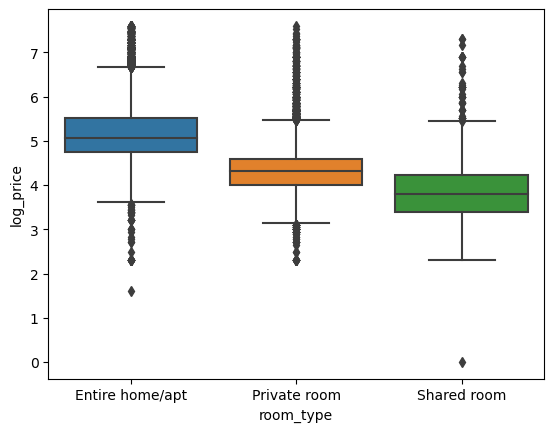

In [24]:
sns.boxplot(x='room_type', y='log_price', data=data)

<Axes: xlabel='property_type', ylabel='log_price'>

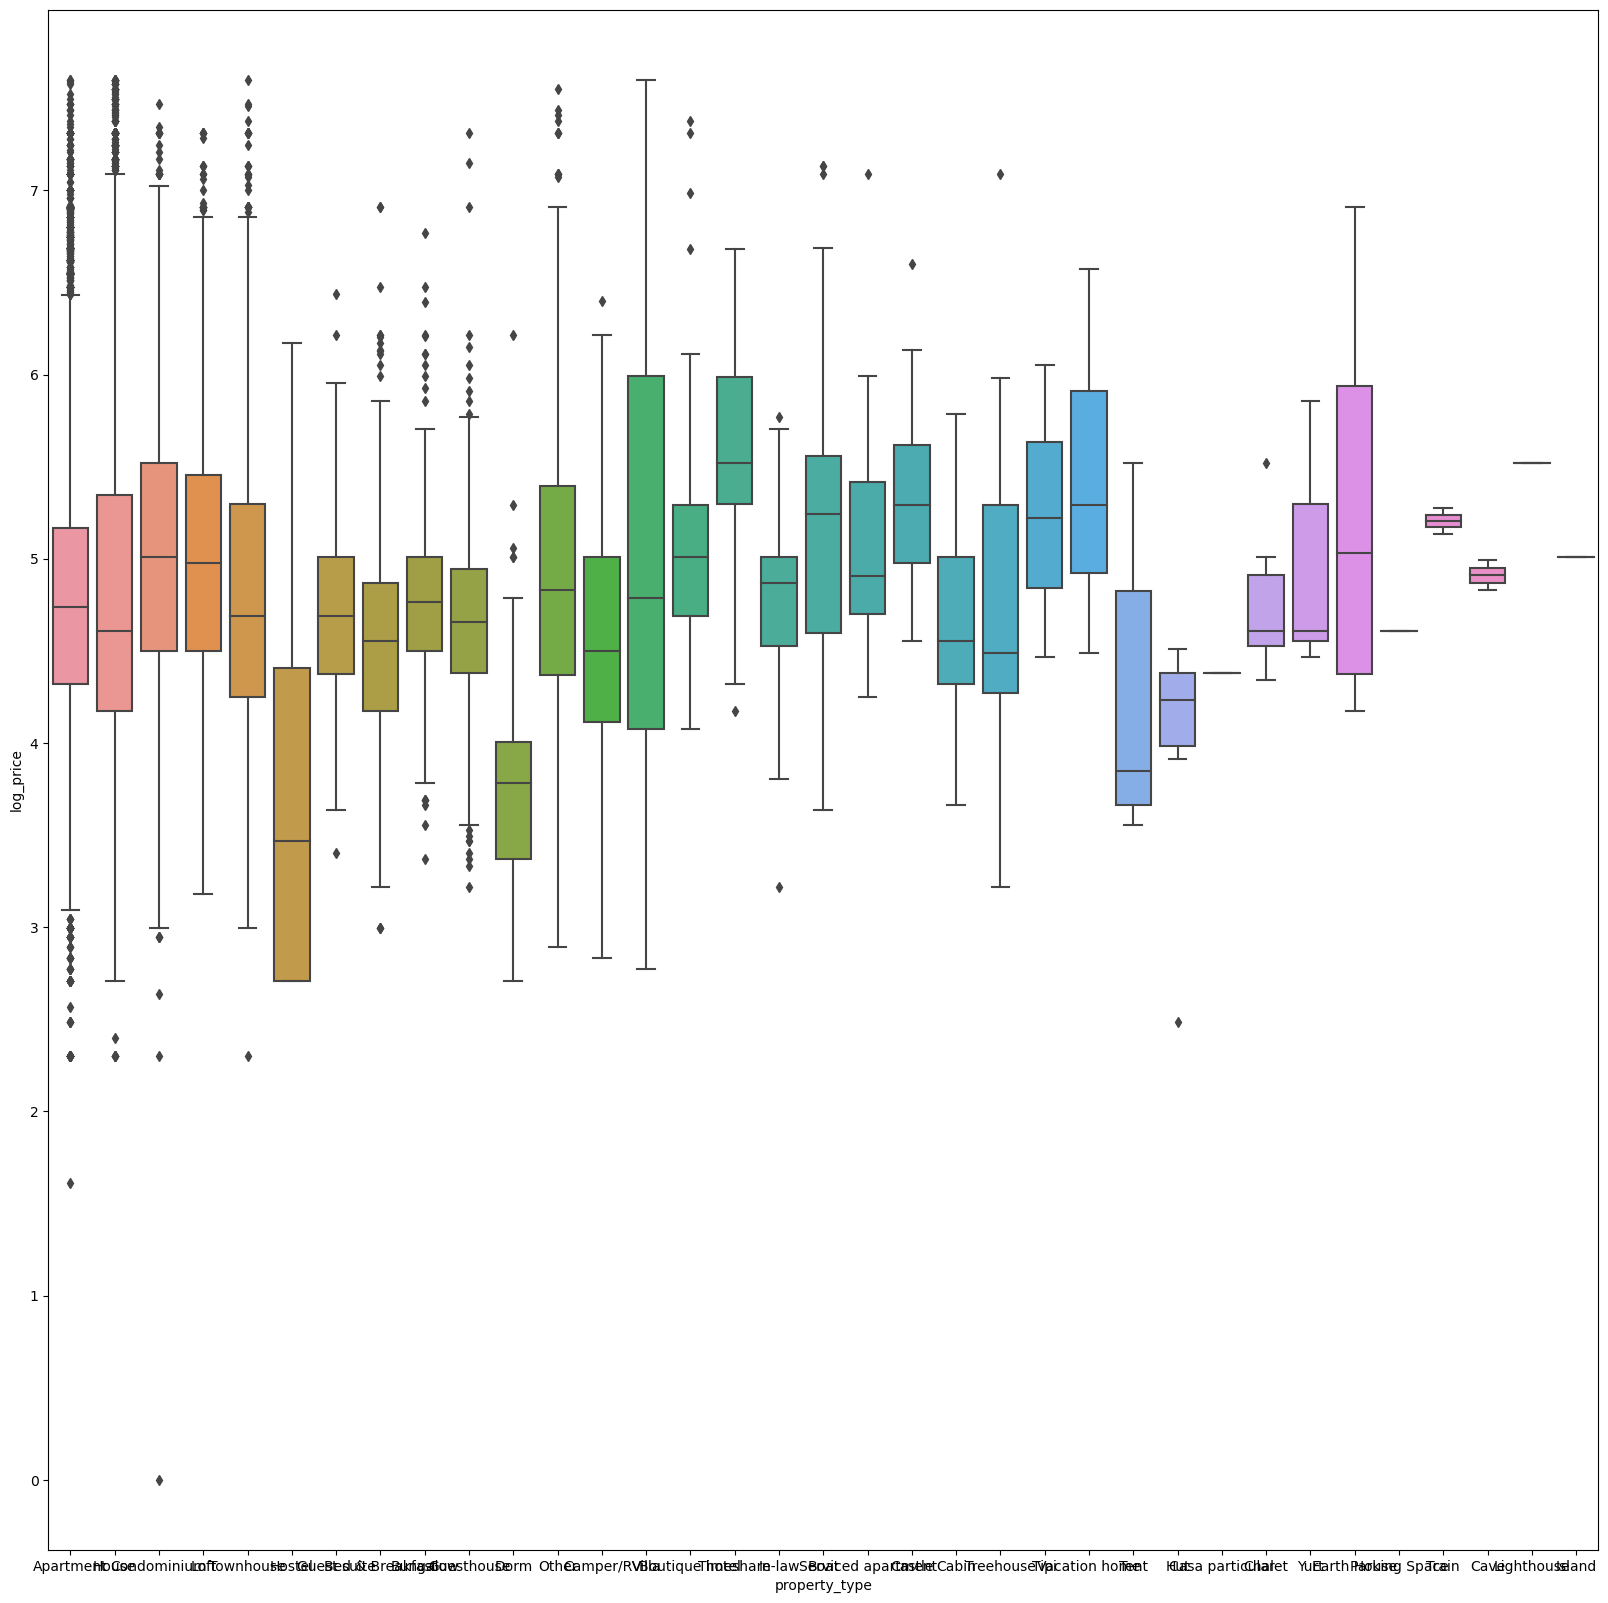

In [25]:
plt.figure(figsize= (20,20))
sns.boxplot(x='property_type', y='log_price', data=data)

In [26]:
anova_room_type = ols('log_price ~ room_type', data=data).fit()
anova = sm.stats.anova_lm(anova_room_type, typ= 2)

In [27]:
anova

,sum_sq,df,F,PR(>F)
room_type,14284.552652,2.0,22186.870063,0.0
Residual,23856.443583,74108.0,NaN,NaN


In [28]:
data1.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
bedrooms                     91
beds                        131
host_tenure                 188
count_amenities               0
days_dince_last_review    15827
dtype: i

In [29]:
data.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic              object
host_identity_verified            object
host_response_rate               float64
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_ra

In [30]:
categorical_data = data1.select_dtypes(include=['object'])

In [31]:
categorical_data

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,name,neighbourhood,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,f,Beautiful brownstone 1-bedroom,Brooklyn Heights,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,t,f,t,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,t,t,t,The Garden Oasis,Harlem,10027
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,This light-filled home-away-from-home is super...,t,t,f,Beautiful Flat in the Heart of SF!,Lower Haight,94117
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,"Cool, cozy, and comfortable studio located in ...",t,t,t,Great studio in midtown DC,Columbia Heights,20009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,Apartment,Private room,{},Real Bed,flexible,NYC,one room in bushwick apt,t,t,f,one room bushwick,Williamsburg,11206
74107,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,moderate,LA,"Located on the Pacific Coast Highway, this apa...",t,f,f,Spacious Hermosa 2 BR on PCH,Hermosa Beach,90254
74108,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,NYC,A modern apartment located in East Williamsbur...,t,t,t,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,11206
74109,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,strict,NYC,"Fully renovated, designer's studio located in ...",t,f,t,Designer's Apartment in HEART of NYC,West Village,10011


In [32]:
numerical_data = data1.select_dtypes(include=['int', 'float'])

In [33]:
numerical_data

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,host_tenure,count_amenities,days_dince_last_review
0,6901257,5.010635,3,1.0,NaN,40.696524,-73.991617,2,100.0,1.0,1.0,12.0,9,2849.0
1,6304928,5.129899,7,1.0,1.0,40.766115,-73.989040,6,93.0,3.0,3.0,7.0,15,2417.0
2,7919400,4.976734,5,1.0,1.0,40.808110,-73.943756,10,92.0,1.0,3.0,8.0,19,2426.0
3,13418779,6.620073,4,1.0,NaN,37.772004,-122.431619,0,NaN,2.0,2.0,9.0,15,NaN
4,3808709,4.744932,2,1.0,1.0,38.925627,-77.034596,4,40.0,0.0,1.0,9.0,12,2661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,1,1.0,NaN,40.709025,-73.939405,0,NaN,1.0,1.0,11.0,1,NaN
74107,13281809,5.043425,4,2.0,1.0,33.871549,-118.396053,16,93.0,2.0,4.0,8.0,16,2578.0
74108,18688039,5.220356,5,1.0,1.0,40.706749,-73.942377,43,94.0,2.0,2.0,12.0,31,2430.0
74109,17045948,5.273000,2,1.0,1.0,40.738535,-74.000157,0,NaN,0.0,2.0,7.0,15,NaN


In [34]:
duplicate_rows = data1[data1.duplicated()]

In [35]:
duplicate_rows

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,count_amenities,days_dince_last_review


In [36]:
numerical_data.isnull().sum()

id                            0
log_price                     0
accommodates                  0
bathrooms                   200
host_response_rate        18299
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
host_tenure                 188
count_amenities               0
days_dince_last_review    15827
dtype: int64

In [37]:
numerical_data["bathrooms"]=numerical_data["bathrooms"].fillna(0)

In [38]:
numerical_data.isnull().sum()

id                            0
log_price                     0
accommodates                  0
bathrooms                     0
host_response_rate        18299
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
host_tenure                 188
count_amenities               0
days_dince_last_review    15827
dtype: int64

In [39]:
numerical_data["host_response_rate"].unique()

array([ nan, 1.  , 0.71, 0.68, 0.67, 0.83, 0.5 , 0.9 , 0.86, 0.92, 0.82,
       0.8 , 0.89, 0.93, 0.99, 0.  , 0.88, 0.96, 0.7 , 0.94, 0.91, 0.25,
       0.95, 0.98, 0.62, 0.29, 0.33, 0.81, 0.63, 0.38, 0.6 , 0.79, 0.78,
       0.75, 0.65, 0.97, 0.87, 0.4 , 0.54, 0.53, 0.58, 0.76, 0.3 , 0.64,
       0.17, 0.2 , 0.77, 0.73, 0.41, 0.59, 0.57, 0.85, 0.56, 0.42, 0.44,
       0.35, 0.14, 0.74, 0.27, 0.1 , 0.84, 0.06, 0.72, 0.36, 0.55, 0.43,
       0.13, 0.39, 0.46, 0.26, 0.61, 0.52, 0.23, 0.22, 0.69, 0.66, 0.15,
       0.11, 0.31, 0.21, 0.47])

In [40]:
numerical_data["host_response_rate"]=numerical_data["host_response_rate"].fillna(numerical_data["host_response_rate"].mean())

In [41]:
numerical_data["review_scores_rating"].unique()

array([100.,  93.,  92.,  nan,  40.,  97.,  99.,  90.,  89.,  91.,  88.,
        86.,  72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,
        60.,  75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,
        71.,  77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,
        64.,  27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

In [42]:
numerical_data["review_scores_rating"]=numerical_data["review_scores_rating"].fillna(numerical_data["review_scores_rating"].mean())

In [43]:
numerical_data["review_scores_rating"]=numerical_data["review_scores_rating"].round()

In [44]:
numerical_data["bedrooms"].unique()

array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

In [45]:
numerical_data["bedrooms"]=numerical_data["bedrooms"].fillna((numerical_data["bedrooms"].mean()).round())

In [46]:
numerical_data["beds"].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0., 18.])

In [47]:
numerical_data["beds"]=numerical_data["beds"].fillna((numerical_data["beds"].mean()).round())

In [48]:
numerical_data["host_tenure"].unique()

array([12.,  7.,  8.,  9., 11., 10., 13., 14., nan, 15., 16.])

In [49]:
numerical_data["host_tenure"]=numerical_data["host_tenure"].fillna((numerical_data["host_tenure"].mean()).round())

In [50]:
numerical_data["days_dince_last_review"]=numerical_data["days_dince_last_review"].fillna(numerical_data["days_dince_last_review"].max())

In [51]:
numerical_data["days_dince_last_review"].unique()

array([2849., 2417., 2426., ..., 3618., 3653., 3782.])

In [52]:
numerical_data.isnull().sum()

id                        0
log_price                 0
accommodates              0
bathrooms                 0
host_response_rate        0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
host_tenure               0
count_amenities           0
days_dince_last_review    0
dtype: int64

In [53]:
correlation_with_one_column = numerical_data.corrwith(numerical_data['log_price'])

In [54]:
correlation_with_one_column

id                       -0.007178
log_price                 1.000000
accommodates              0.567574
bathrooms                 0.354098
host_response_rate       -0.005748
latitude                 -0.002193
longitude                -0.047529
number_of_reviews        -0.032470
review_scores_rating      0.074475
bedrooms                  0.473028
beds                      0.441619
host_tenure               0.077516
count_amenities           0.194528
days_dince_last_review    0.091750
dtype: float64

In [55]:
x = numerical_data.columns
print(x)

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'host_response_rate',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_tenure', 'count_amenities',
       'days_dince_last_review'],
      dtype='object')


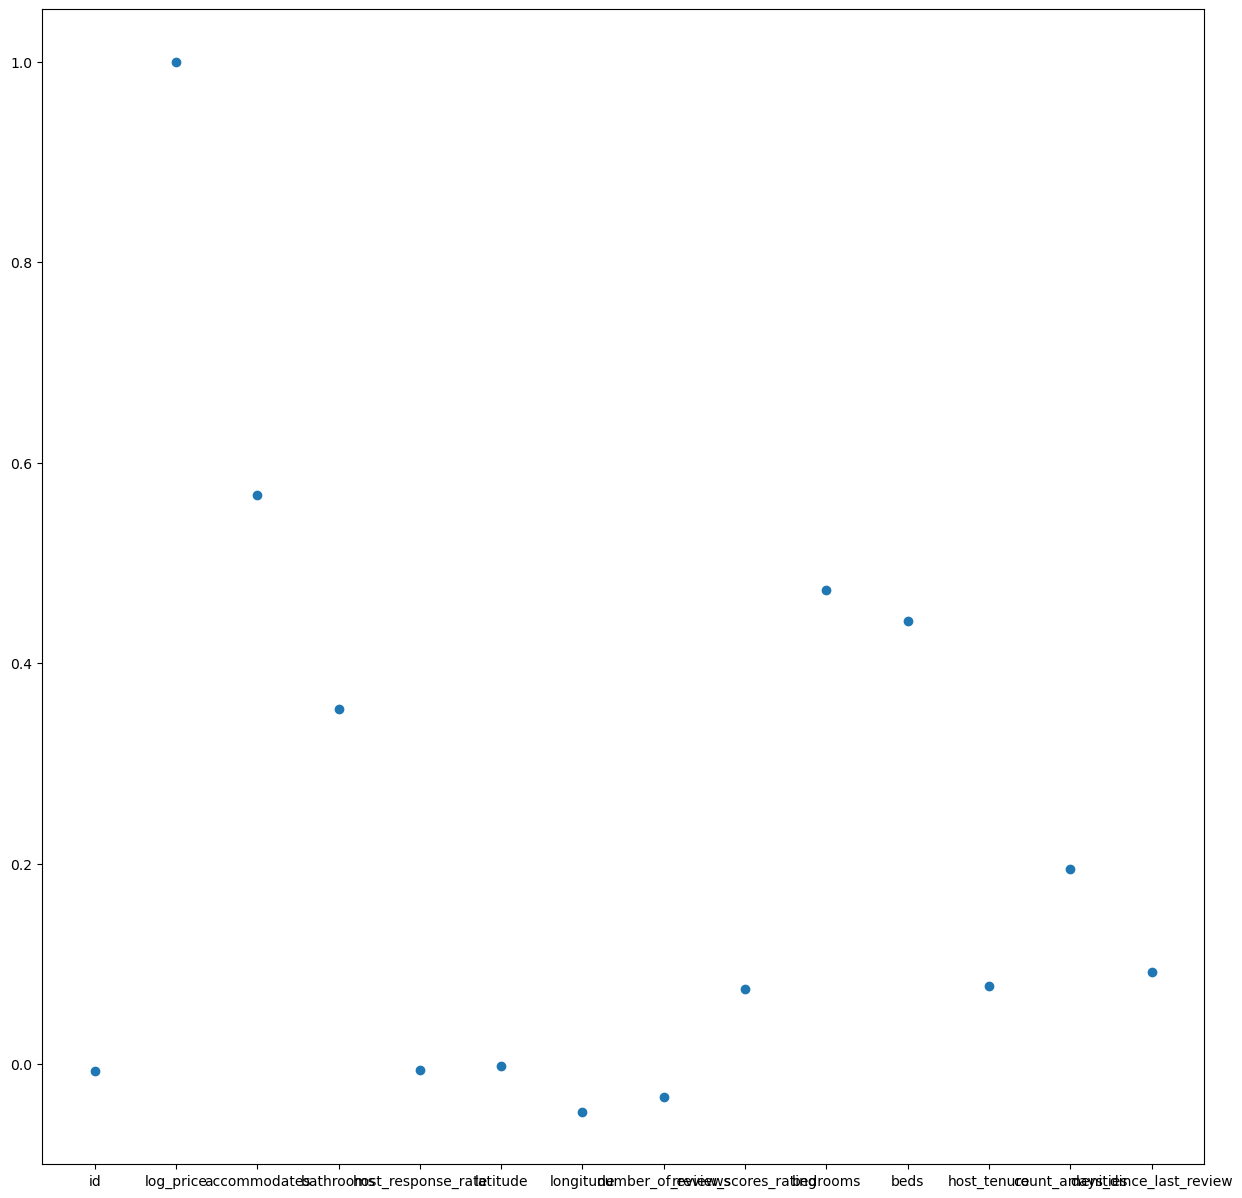

In [56]:
plt.figure(figsize = (15,15))
plt.scatter(x,correlation_with_one_column)

We can see **bedrooms, accomodates,bathrooms, beds** has high  positive
correlation

In [175]:
for col in categorical_data:
    groups = []
    for category in data[col].unique():
        groups.append(data[data[col] == category]['log_price'])
    f_statistic, p_value = f_oneway(*groups)
    print(f'ANOVA for {col}: F-statistic={f_statistic}, p-value={p_value}')

ANOVA for property_type: F-statistic=38.58756524843381, p-value=1.7429845404071438e-251
ANOVA for room_type: F-statistic=22186.870063414786, p-value=0.0
ANOVA for amenities: F-statistic=1.6350564669531638, p-value=3.745929103832452e-148
ANOVA for bed_type: F-statistic=188.41837882579674, p-value=5.513351975770508e-161
ANOVA for cancellation_policy: F-statistic=387.6164275729777, p-value=0.0
ANOVA for city: F-statistic=628.9996862355914, p-value=0.0


C:\Users\vivek\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA for description: F-statistic=nan, p-value=nan
ANOVA for host_has_profile_pic: F-statistic=nan, p-value=nan
ANOVA for host_identity_verified: F-statistic=nan, p-value=nan
ANOVA for instant_bookable: F-statistic=145.53489886162816, p-value=1.7637405373462655e-33
ANOVA for name: F-statistic=nan, p-value=nan
ANOVA for neighbourhood: F-statistic=nan, p-value=nan
ANOVA for zipcode: F-statistic=nan, p-value=nan


KeyError: 'property_type_Apartment'

Based on the above scores **"property, room_type, amenities, bed_type,cancellation_policy, city, instant_bookable** have high significance with respect to **log_price**


In [57]:
!pip install folium

#Geo Spatial Analysis

In [129]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

mymap = folium.Map(location=[data1['latitude'].mean(), data1['longitude'].mean()], zoom_start=10)

city_cluster = MarkerCluster(name='Cities').add_to(mymap)
for index, row in data1.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], popup=row['city'], radius = 4,fill = True, fill_opacity = 0.5).add_to(city_cluster)

neighborhood_cluster = MarkerCluster(name='neighbourhoods').add_to(mymap)
for index, row in data1.iterrows():
    color = 'red' if row['log_price'] > data1['log_price'].mean() else 'blue' 
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['neighbourhood'], icon=folium.Icon(color=color)).add_to(neighborhood_cluster)

mymap.save("map_with_markers1.html")

# SENTIMENT ANALYSIS

In [58]:
!pip install nltk
!pip install textblob

In [59]:
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [60]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
sent_data = data1[['log_price','description','name']]

In [62]:
sent_data

,log_price,description,name
0,5.010635,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom
1,5.129899,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square
2,4.976734,The Oasis comes complete with a full backyard ...,The Garden Oasis
3,6.620073,This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!
4,4.744932,"Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC
...,...,...,...
74106,4.605170,one room in bushwick apt,one room bushwick
74107,5.043425,"Located on the Pacific Coast Highway, this apa...",Spacious Hermosa 2 BR on PCH
74108,5.220356,A modern apartment located in East Williamsbur...,Modern 2 Bedroom Apartment in Williamsburg
74109,5.273000,"Fully renovated, designer's studio located in ...",Designer's Apartment in HEART of NYC


##cleaning description for sentiment analysis

In [63]:
sent_data['new_description']=sent_data['description'].apply(lambda x: " ".join(word.lower() for word in str(x).split()))

C:\Users\vivek\AppData\Local\Temp\ipykernel_25252\592270335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_data['new_description']=sent_data['description'].apply(lambda x: " ".join(word.lower() for word in str(x).split()))


In [64]:
sent_data

,log_price,description,name,new_description
0,5.010635,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom,"beautiful, sunlit brownstone 1-bedroom in the ..."
1,5.129899,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square,enjoy travelling during your stay in manhattan...
2,4.976734,The Oasis comes complete with a full backyard ...,The Garden Oasis,the oasis comes complete with a full backyard ...
3,6.620073,This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!,this light-filled home-away-from-home is super...
4,4.744932,"Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC,"cool, cozy, and comfortable studio located in ..."
...,...,...,...,...
74106,4.605170,one room in bushwick apt,one room bushwick,one room in bushwick apt
74107,5.043425,"Located on the Pacific Coast Highway, this apa...",Spacious Hermosa 2 BR on PCH,"located on the pacific coast highway, this apa..."
74108,5.220356,A modern apartment located in East Williamsbur...,Modern 2 Bedroom Apartment in Williamsburg,a modern apartment located in east williamsbur...
74109,5.273000,"Fully renovated, designer's studio located in ...",Designer's Apartment in HEART of NYC,"fully renovated, designer's studio located in ..."


In [65]:
def clean(text):
  clean_text = text.translate(str.maketrans('', '', string.punctuation))
  clean_text = clean_text.lower()
  tokens = word_tokenize(clean_text)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  cleaned_text = ' '.join(lemmatized_tokens)
  return cleaned_text

In [66]:
sent_data['new_description']=sent_data['new_description'].apply(clean)

C:\Users\vivek\AppData\Local\Temp\ipykernel_25252\1356576237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_data['new_description']=sent_data['new_description'].apply(clean)


In [67]:
sent_data

,log_price,description,name,new_description
0,5.010635,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom,beautiful sunlit brownstone 1bedroom loveliest...
1,5.129899,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square,enjoy travelling stay manhattan place centrall...
2,4.976734,The Oasis comes complete with a full backyard ...,The Garden Oasis,oasis come complete full backyard outdoor furn...
3,6.620073,This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!,lightfilled homeawayfromhome super clean come ...
4,4.744932,"Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC,cool cozy comfortable studio located heart cit...
...,...,...,...,...
74106,4.605170,one room in bushwick apt,one room bushwick,one room bushwick apt
74107,5.043425,"Located on the Pacific Coast Highway, this apa...",Spacious Hermosa 2 BR on PCH,located pacific coast highway apartment extrem...
74108,5.220356,A modern apartment located in East Williamsbur...,Modern 2 Bedroom Apartment in Williamsburg,modern apartment located east williamsburg pla...
74109,5.273000,"Fully renovated, designer's studio located in ...",Designer's Apartment in HEART of NYC,fully renovated designer studio located one de...


In [68]:
sent_data['sentiment_score'] = sent_data['new_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

C:\Users\vivek\AppData\Local\Temp\ipykernel_25252\2773832139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_data['sentiment_score'] = sent_data['new_description'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [69]:
sent_data

,log_price,description,name,new_description,sentiment_score
0,5.010635,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom,beautiful sunlit brownstone 1bedroom loveliest...,0.716667
1,5.129899,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square,enjoy travelling stay manhattan place centrall...,0.250000
2,4.976734,The Oasis comes complete with a full backyard ...,The Garden Oasis,oasis come complete full backyard outdoor furn...,0.291278
3,6.620073,This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!,lightfilled homeawayfromhome super clean come ...,0.251515
4,4.744932,"Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC,cool cozy comfortable studio located heart cit...,0.265000
...,...,...,...,...,...
74106,4.605170,one room in bushwick apt,one room bushwick,one room bushwick apt,0.600000
74107,5.043425,"Located on the Pacific Coast Highway, this apa...",Spacious Hermosa 2 BR on PCH,located pacific coast highway apartment extrem...,0.174256
74108,5.220356,A modern apartment located in East Williamsbur...,Modern 2 Bedroom Apartment in Williamsburg,modern apartment located east williamsburg pla...,0.229167
74109,5.273000,"Fully renovated, designer's studio located in ...",Designer's Apartment in HEART of NYC,fully renovated designer studio located one de...,0.313889


In [70]:
sent_data['sentiment_score'].max()

1.0

In [71]:
sent_data['sent_values'] =sent_data['sentiment_score'].apply(lambda x: 1 if x>0 else 0)

C:\Users\vivek\AppData\Local\Temp\ipykernel_25252\3960010965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_data['sent_values'] =sent_data['sentiment_score'].apply(lambda x: 1 if x>0 else 0)


#Amenities Analysis

In [72]:
numerical_data['count_amenities'].max()

86

In [73]:
def parse(amenities_str):
  amenities_list = amenities_str.strip('{}').replace('"', '').split(',')
  set(amenities_list)
  return amenities_list

In [74]:
data1['amenities'] = data1['amenities'].apply(parse)

In [75]:
data1["count_amenities"] = data1["amenities"].apply(len)

In [76]:
data1['count_amenities'].max()

86

#Categorical Data Encoding

In [77]:
data1

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,count_amenities,days_dince_last_review
0,6901257,5.010635,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12.0,9,2849.0
1,6304928,5.129899,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7.0,15,2417.0
2,7919400,4.976734,Apartment,Entire home/apt,"[TV, Cable TV, Wireless Internet, Air conditio...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8.0,19,2426.0
3,13418779,6.620073,House,Entire home/apt,"[TV, Cable TV, Internet, Wireless Internet, Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,t,t,NaN,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9.0,15,NaN
4,3808709,4.744932,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9.0,12,2661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,[],1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,NaT,t,t,NaN,2013-03-24,f,NaT,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,11206,1.0,1.0,11.0,1,NaN
74107,13281809,5.043425,Apartment,Entire home/apt,"[TV, Cable TV, Internet, Wireless Internet, Ki...",4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",2016-08-15,t,f,1.0,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0,8.0,16,2578.0
74108,18688039,5.220356,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,2015-01-03,t,t,1.0,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206,2.0,2.0,12.0,31,2430.0
74109,17045948,5.273000,Apartment,Entire home/apt,"[TV, Wireless Internet, Air conditioning, Kitc...",2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",NaT,t,f,1.0,2017-09-17,t,NaT,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,10011,0.0,2.0,7.0,15,NaN


In [78]:
categorical_data

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,name,neighbourhood,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,f,Beautiful brownstone 1-bedroom,Brooklyn Heights,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,t,f,t,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,t,t,t,The Garden Oasis,Harlem,10027
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,This light-filled home-away-from-home is super...,t,t,f,Beautiful Flat in the Heart of SF!,Lower Haight,94117
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,"Cool, cozy, and comfortable studio located in ...",t,t,t,Great studio in midtown DC,Columbia Heights,20009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,Apartment,Private room,{},Real Bed,flexible,NYC,one room in bushwick apt,t,t,f,one room bushwick,Williamsburg,11206
74107,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,moderate,LA,"Located on the Pacific Coast Highway, this apa...",t,f,f,Spacious Hermosa 2 BR on PCH,Hermosa Beach,90254
74108,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,NYC,A modern apartment located in East Williamsbur...,t,t,t,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,11206
74109,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,strict,NYC,"Fully renovated, designer's studio located in ...",t,f,t,Designer's Apartment in HEART of NYC,West Village,10011


In [79]:
categorical_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [80]:
categorical_data["property_type"].value_counts().sort_values(ascending=False)

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

In [81]:
categorical_data['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [82]:
categorical_data['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [83]:
categorical_data['city'].unique()

array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

In [84]:
top_20 = [x for x in categorical_data.property_type.value_counts().sort_values(ascending=False).head(20).index]

top_20

['Apartment',
 'House',
 'Condominium',
 'Townhouse',
 'Loft',
 'Other',
 'Guesthouse',
 'Bed & Breakfast',
 'Bungalow',
 'Villa',
 'Dorm',
 'Guest suite',
 'Camper/RV',
 'Timeshare',
 'Cabin',
 'In-law',
 'Hostel',
 'Boutique hotel',
 'Boat',
 'Serviced apartment']

In [85]:
def one_hot_top(dat, record, top):
  for label in top:
    dat[record+'_'+label] = np.where(dat[record]==label,1,0)

one_hot_top(categorical_data, 'property_type', top_20)

In [86]:
categorical_data

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,name,neighbourhood,zipcode,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,f,Beautiful brownstone 1-bedroom,Brooklyn Heights,11201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,t,f,t,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,10019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,t,t,t,The Garden Oasis,Harlem,10027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,This light-filled home-away-from-home is super...,t,t,f,Beautiful Flat in the Heart of SF!,Lower Haight,94117,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,"Cool, cozy, and comfortable studio located in ...",t,t,t,Great studio in midtown DC,Columbia Heights,20009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,Apartment,Private room,{},Real Bed,flexible,NYC,one room in bushwick apt,t,t,f,one room bushwick,Williamsburg,11206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74107,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,moderate,LA,"Located on the Pacific Coast Highway, this apa...",t,f,f,Spacious Hermosa 2 BR on PCH,Hermosa Beach,90254,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74108,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,NYC,A modern apartment located in East Williamsbur...,t,t,t,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,11206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74109,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,strict,NYC,"Fully renovated, designer's studio located in ...",t,f,t,Designer's Apartment in HEART of NYC,West Village,10011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
columns_to_encode = ['room_type', 'bed_type','cancellation_policy', 'city','instant_bookable']
encoded_data = pd.concat([categorical_data[col].str.get_dummies(sep=',') for col in columns_to_encode], axis=1)

In [88]:
encoded_data

,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
74107,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
74108,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
74109,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [89]:
new_encoded_data = pd.concat([categorical_data , encoded_data], ignore_index=False, axis=1)

In [90]:
new_encoded_data

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,name,neighbourhood,zipcode,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,f,Beautiful brownstone 1-bedroom,Brooklyn Heights,11201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,t,f,t,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,10019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,t,t,t,The Garden Oasis,Harlem,10027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,This light-filled home-away-from-home is super...,t,t,f,Beautiful Flat in the Heart of SF!,Lower Haight,94117,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,"Cool, cozy, and comfortable studio located in ...",t,t,t,Great studio in midtown DC,Columbia Heights,20009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,Apartment,Private room,{},Real Bed,flexible,NYC,one room in bushwick apt,t,t,f,one room bushwick,Williamsburg,11206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
74107,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,moderate,LA,"Located on the Pacific Coast Highway, this apa...",t,f,f,Spacious Hermosa 2 BR on PCH,Hermosa Beach,90254,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
74108,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,NYC,A modern apartment located in East Williamsbur...,t,t,t,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,11206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
74109,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,strict,NYC,"Fully renovated, designer's studio located in ...",t,f,t,Designer's Apartment in HEART of NYC,West Village,10011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [91]:
new_encoded_data.drop(columns = ['property_type','room_type', 'bed_type','cancellation_policy', 'city','instant_bookable'], inplace=True)

In [92]:
new_encoded_data

,amenities,description,host_has_profile_pic,host_identity_verified,name,neighbourhood,zipcode,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t
0,"{""Wireless Internet"",""Air conditioning"",Kitche...","Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,Beautiful brownstone 1-bedroom,Brooklyn Heights,11201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,"{""Wireless Internet"",""Air conditioning"",Kitche...",Enjoy travelling during your stay in Manhattan...,t,f,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,10019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",The Oasis comes complete with a full backyard ...,t,t,The Garden Oasis,Harlem,10027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",This light-filled home-away-from-home is super...,t,t,Beautiful Flat in the Heart of SF!,Lower Haight,94117,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,"{TV,Internet,""Wireless Internet"",""Air conditio...","Cool, cozy, and comfortable studio located in ...",t,t,Great studio in midtown DC,Columbia Heights,20009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,{},one room in bushwick apt,t,t,one room bushwick,Williamsburg,11206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
74107,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","Located on the Pacific Coast Highway, this apa...",t,f,Spacious Hermosa 2 BR on PCH,Hermosa Beach,90254,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
74108,"{TV,Internet,""Wireless Internet"",""Air conditio...",A modern apartment located in East Williamsbur...,t,t,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,11206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
74109,"{TV,""Wireless Internet"",""Air conditioning"",Kit...","Fully renovated, designer's studio located in ...",t,f,Designer's Apartment in HEART of NYC,West Village,10011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [93]:
new_encoded_data.drop(columns =['amenities','description','host_has_profile_pic','host_identity_verified','name','neighbourhood','zipcode'], inplace = True)

In [94]:
new_encoded_data

,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
74107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
74108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
74109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [95]:
numerical_data

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,host_tenure,count_amenities,days_dince_last_review
0,6901257,5.010635,3,1.0,0.94352,40.696524,-73.991617,2,100.0,1.0,1.0,12.0,9,2849.0
1,6304928,5.129899,7,1.0,1.00000,40.766115,-73.989040,6,93.0,3.0,3.0,7.0,15,2417.0
2,7919400,4.976734,5,1.0,1.00000,40.808110,-73.943756,10,92.0,1.0,3.0,8.0,19,2426.0
3,13418779,6.620073,4,1.0,0.94352,37.772004,-122.431619,0,94.0,2.0,2.0,9.0,15,5584.0
4,3808709,4.744932,2,1.0,1.00000,38.925627,-77.034596,4,40.0,0.0,1.0,9.0,12,2661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,1,1.0,0.94352,40.709025,-73.939405,0,94.0,1.0,1.0,11.0,1,5584.0
74107,13281809,5.043425,4,2.0,1.00000,33.871549,-118.396053,16,93.0,2.0,4.0,8.0,16,2578.0
74108,18688039,5.220356,5,1.0,1.00000,40.706749,-73.942377,43,94.0,2.0,2.0,12.0,31,2430.0
74109,17045948,5.273000,2,1.0,1.00000,40.738535,-74.000157,0,94.0,0.0,2.0,7.0,15,5584.0


In [96]:
sent_data

,log_price,description,name,new_description,sentiment_score,sent_values
0,5.010635,"Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom,beautiful sunlit brownstone 1bedroom loveliest...,0.716667,1
1,5.129899,Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square,enjoy travelling stay manhattan place centrall...,0.250000,1
2,4.976734,The Oasis comes complete with a full backyard ...,The Garden Oasis,oasis come complete full backyard outdoor furn...,0.291278,1
3,6.620073,This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!,lightfilled homeawayfromhome super clean come ...,0.251515,1
4,4.744932,"Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC,cool cozy comfortable studio located heart cit...,0.265000,1
...,...,...,...,...,...,...
74106,4.605170,one room in bushwick apt,one room bushwick,one room bushwick apt,0.600000,1
74107,5.043425,"Located on the Pacific Coast Highway, this apa...",Spacious Hermosa 2 BR on PCH,located pacific coast highway apartment extrem...,0.174256,1
74108,5.220356,A modern apartment located in East Williamsbur...,Modern 2 Bedroom Apartment in Williamsburg,modern apartment located east williamsburg pla...,0.229167,1
74109,5.273000,"Fully renovated, designer's studio located in ...",Designer's Apartment in HEART of NYC,fully renovated designer studio located one de...,0.313889,1


In [97]:
new_encoded_data_1 = pd.concat([new_encoded_data , sent_data[['log_price', 'sent_values']]], ignore_index=False, axis=1)

In [98]:
new_encoded_data_1

,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t,log_price,sent_values
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5.010635,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5.129899,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,4.976734,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,6.620073,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,4.744932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,4.605170,1
74107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,5.043425,1
74108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,5.220356,1
74109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5.273000,1


In [99]:
numerical_data.drop(columns =['id','log_price','host_response_rate','latitude','longitude','number_of_reviews','host_tenure','days_dince_last_review'], inplace = True)

In [100]:
numerical_data

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,count_amenities
0,3,1.0,100.0,1.0,1.0,9
1,7,1.0,93.0,3.0,3.0,15
2,5,1.0,92.0,1.0,3.0,19
3,4,1.0,94.0,2.0,2.0,15
4,2,1.0,40.0,0.0,1.0,12
...,...,...,...,...,...,...
74106,1,1.0,94.0,1.0,1.0,1
74107,4,2.0,93.0,2.0,4.0,16
74108,5,1.0,94.0,2.0,2.0,31
74109,2,1.0,94.0,0.0,2.0,15


In [101]:
final_dataset =pd.concat([new_encoded_data_1 , numerical_data[['accommodates','bathrooms','review_scores_rating','bedrooms','beds','count_amenities']]], ignore_index=False, axis=1)

In [102]:
final_dataset

,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t,log_price,sent_values,accommodates,bathrooms,review_scores_rating,bedrooms,beds,count_amenities
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5.010635,1,3,1.0,100.0,1.0,1.0,9
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5.129899,1,7,1.0,93.0,3.0,3.0,15
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,4.976734,1,5,1.0,92.0,1.0,3.0,19
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,6.620073,1,4,1.0,94.0,2.0,2.0,15
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,4.744932,1,2,1.0,40.0,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,4.605170,1,1,1.0,94.0,1.0,1.0,1
74107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,5.043425,1,4,2.0,93.0,2.0,4.0,16
74108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,5.220356,1,5,1.0,94.0,2.0,2.0,31
74109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5.273000,1,2,1.0,94.0,0.0,2.0,15


In [151]:
X = final_dataset.drop('log_price', axis =1)

In [152]:
Y= final_dataset.iloc[:,41:42].values

In [153]:
X

,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t,sent_values,accommodates,bathrooms,review_scores_rating,bedrooms,beds,count_amenities
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0.133333,0.125,1.0000,0.1,0.055556,0.094118
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0.400000,0.125,0.9125,0.3,0.166667,0.164706
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0.266667,0.125,0.9000,0.1,0.166667,0.211765
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0.200000,0.125,0.9250,0.2,0.111111,0.164706
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0.066667,0.125,0.2500,0.0,0.055556,0.129412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0.000000,0.125,0.9250,0.1,0.055556,0.000000
74107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.200000,0.250,0.9125,0.2,0.222222,0.176471
74108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0.266667,0.125,0.9250,0.2,0.111111,0.352941
74109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0.066667,0.125,0.9250,0.0,0.111111,0.164706


In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
mms = MinMaxScaler()

In [149]:
final_dataset[['accommodates','bathrooms','review_scores_rating','bedrooms','beds','count_amenities']] = mms.fit_transform(final_dataset[['accommodates','bathrooms','review_scores_rating','bedrooms','beds','count_amenities']])

In [150]:
final_dataset

,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Dorm,property_type_Guest suite,property_type_Camper/RV,property_type_Timeshare,property_type_Cabin,property_type_In-law,property_type_Hostel,property_type_Boutique hotel,property_type_Boat,property_type_Serviced apartment,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF,f,t,log_price,sent_values,accommodates,bathrooms,review_scores_rating,bedrooms,beds,count_amenities
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5.010635,1,0.133333,0.125,1.0000,0.1,0.055556,0.094118
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5.129899,1,0.400000,0.125,0.9125,0.3,0.166667,0.164706
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,4.976734,1,0.266667,0.125,0.9000,0.1,0.166667,0.211765
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,6.620073,1,0.200000,0.125,0.9250,0.2,0.111111,0.164706
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,4.744932,1,0.066667,0.125,0.2500,0.0,0.055556,0.129412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,4.605170,1,0.000000,0.125,0.9250,0.1,0.055556,0.000000
74107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,5.043425,1,0.200000,0.250,0.9125,0.2,0.222222,0.176471
74108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,5.220356,1,0.266667,0.125,0.9250,0.2,0.111111,0.352941
74109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5.273000,1,0.066667,0.125,0.9250,0.0,0.111111,0.164706


In [154]:
Y.shape

(74111, 1)

In [155]:
Y.reshape(-1)

array([5.01063529, 5.12989871, 4.97673374, ..., 5.22035583, 5.27299956,
       4.85203026])

In [156]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(X_test)

In [161]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_squared_error

In [162]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.2267607286265744
R-squared: 0.5585958791037526
Mean Absolute Error (MAE): 0.3590200086321777
Root Mean Squared Error (RMSE): 0.47619400314007987


In [163]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [164]:
ridge_reg = Ridge(alpha=2.0)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=2.0)

In [165]:
y_pred_ridge = ridge_reg.predict(X_test)

In [166]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)

Mean Squared Error: 0.22678311577350102
R-squared: 0.5585523011042974
Mean Absolute Error (MAE): 0.35898840873941257
Root Mean Squared Error (RMSE): 0.476217508890109


In [167]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

Lasso()

In [168]:
y_pred_lasso = lasso_reg.predict(X_test)

In [169]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)

Mean Squared Error: 0.5137845181474038
R-squared: -0.00011410677915502099
Mean Absolute Error (MAE): 0.5603603024938528
Root Mean Squared Error (RMSE): 0.7167876381100637


In [170]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet()

In [171]:
y_pred_elastic = elastic_net.predict(X_test)

In [173]:
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)

print("Mean Squared Error:", mse_elastic)
print("R-squared:", r2_elastic)
print("Mean Absolute Error (MAE):", mae_elastic)
print("Root Mean Squared Error (RMSE):", rmse_elastic)

Mean Squared Error: 0.5137845181474038
R-squared: -0.00011410677915502099
Mean Absolute Error (MAE): 0.5603603024938528
Root Mean Squared Error (RMSE): 0.7167876381100637


In [174]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [175]:
y_pred_tree = decision_tree.predict(X_test)

In [176]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)
print("Mean Absolute Error (MAE):", mae_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)

Mean Squared Error: 0.37271315826873497
R-squared: 0.27449023043580534
Mean Absolute Error (MAE): 0.4538478641808376
Root Mean Squared Error (RMSE): 0.6105023818698294


In [179]:
Y = Y.ravel()
Y.shape

(74111,)

In [181]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [182]:
y_pred_random = random_forest.predict(X_test)

In [183]:
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mse_random)

print("Mean Squared Error:", mse_random)
print("R-squared:", r2_random)
print("Mean Absolute Error (MAE):", mae_random)
print("Root Mean Squared Error (RMSE):", rmse_random)

Mean Squared Error: 0.22822106221612187
R-squared: 0.5557532472767444
Mean Absolute Error (MAE): 0.3575941059566322
Root Mean Squared Error (RMSE): 0.4777248813031637


In [138]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
>>> regr = AdaBoostRegressor(random_state=0, n_estimators=100)
>>> regr.fit(X, y)
AdaBoostRegressor(n_estimators=100, random_state=0)

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

In [185]:
reg = GradientBoostingRegressor(random_state=22)

In [186]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=22)

In [187]:
reg_val = reg.predict(X_test)

In [188]:
mse_gra = mean_squared_error(y_test, reg_val)
r2_gra = r2_score(y_test, reg_val)
mae_gra = mean_absolute_error(y_test, reg_val)
rmse_gra = np.sqrt(mse_gra)

print("Mean Squared Error:", mse_gra)
print("R-squared:", r2_gra)
print("Mean Absolute Error (MAE):", mae_gra)
print("Root Mean Squared Error (RMSE):", rmse_gra)

Mean Squared Error: 0.2074888672240118
R-squared: 0.5961097779695528
Mean Absolute Error (MAE): 0.3434202661478629
Root Mean Squared Error (RMSE): 0.4555094589841267


In [193]:
!pip install Xgboost

In [195]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [197]:
import xgboost as xgb

In [198]:
xgb_boost = xgb.XGBRegressor()

In [199]:
xgb_boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [200]:
y_pred_xgb = xgb_boost.predict(X_test)

In [201]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)

Mean Squared Error: 0.19891368857626518
R-squared: 0.6128019063440833
Mean Absolute Error (MAE): 0.3351854562541869
Root Mean Squared Error (RMSE): 0.4459974087102583


In [206]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [207]:
param_grid = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"     : [3,6,9,12,15,18],
    "min_child_weight" : [1,2,3,4,5,6],
    "gamma"     : [0.0,0.1,0.2,0.3,0.4,0.5],
    "colsample_bytes" : [0.4,0.5,0.6,0.7,0.8,0.9]
        
}

In [222]:
 random_search_cv = RandomizedSearchCV(xgb_boost, param_distributions = param_grid, n_iter = 36,scoring = 'roc_auc', n_jobs = -1, verbose = 4)

In [221]:
grid_search_cv = GridSearchCV(xgb_boost, param_grid = param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)

In [254]:
random_search_cv.fit(X_test,y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\vivek\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:27:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytes" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=36, n_jobs=-1,
                   param_distributions={'colsample_bytes': [0.4, 0.5, 0.6, 0.7,
                                                            0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 6, 9, 12, 15, 18],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6]},
                   scoring='roc_auc', verbose=4)

In [223]:
grid_search_cv.fit(X_test,y_test)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
C:\Users\vivek\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:36:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytes" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytes': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 6, 9, 12, 15, 18],
                         'min_child_weight': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy', verbose=4)

In [265]:
val_shap_est = random_search_cv.best_estimator_

In [224]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytes=0.4,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [264]:
random_search_cv.best_params_

{'min_child_weight': 2,
 'max_depth': 18,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytes': 0.7}

In [225]:
grid_search_cv.best_params_

{'colsample_bytes': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1}

In [258]:
y_pred_xgb_improved = random_search_cv.predict(X_test)

In [260]:
mse_xgb_imp = mean_squared_error(y_test, y_pred_xgb_improved)
r2_xgb_imp = r2_score(y_test, y_pred_xgb_improved)
mae_xgb_imp = mean_absolute_error(y_test, y_pred_xgb_improved)
rmse_xgb_imp = np.sqrt(mse_xgb_imp)

print("Mean Squared Error:", mse_xgb_imp)
print("R-squared:", r2_xgb_imp)
print("Mean Absolute Error (MAE):", mae_xgb_imp)
print("Root Mean Squared Error (RMSE):", rmse_xgb_imp)

Mean Squared Error: 0.12231396708348483
R-squared: 0.761908115921043
Mean Absolute Error (MAE): 0.2671894666780508
Root Mean Squared Error (RMSE): 0.3497341377153292


In [227]:
y_pred_xgb_grid_improved = grid_search_cv.predict(X_test)

In [228]:
mse_xgb_grid_imp = mean_squared_error(y_test, y_pred_xgb_grid_improved)
r2_xgb_grid_imp = r2_score(y_test, y_pred_xgb_grid_improved)
mae_xgb_grid_imp = mean_absolute_error(y_test, y_pred_xgb_grid_improved)
rmse_xgb_grid_imp = np.sqrt(mse_xgb_grid_imp)

print("Mean Squared Error:", mse_xgb_grid_imp)
print("R-squared:", r2_xgb_grid_imp)
print("Mean Absolute Error (MAE):", mae_xgb_grid_imp)
print("Root Mean Squared Error (RMSE):", rmse_xgb_grid_imp)

Mean Squared Error: 0.21167958663116057
R-squared: 0.5879522772107615
Mean Absolute Error (MAE): 0.3474283355672969
Root Mean Squared Error (RMSE): 0.4600864990750767


In [231]:
pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/40/6c/850cdf7d0c6351ee9d060c0a24237381ae212c125553afa61198eaa06b0b/shap-0.45.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   --- ----------------------------------- 41.0/455.5 kB 653.6 kB/s eta 0:00:01
   ---------- ----------------------------- 122.9/455.5 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/455.5 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 2.6 MB/s eta 0:00:00


In [232]:
import shap

In [266]:
explainer = shap.Explainer(val_shap_est, X_test)

In [267]:
shap_values = explainer.shap_values(X_test)

 99%|===================| 14679/14823 [01:00<00:00]        

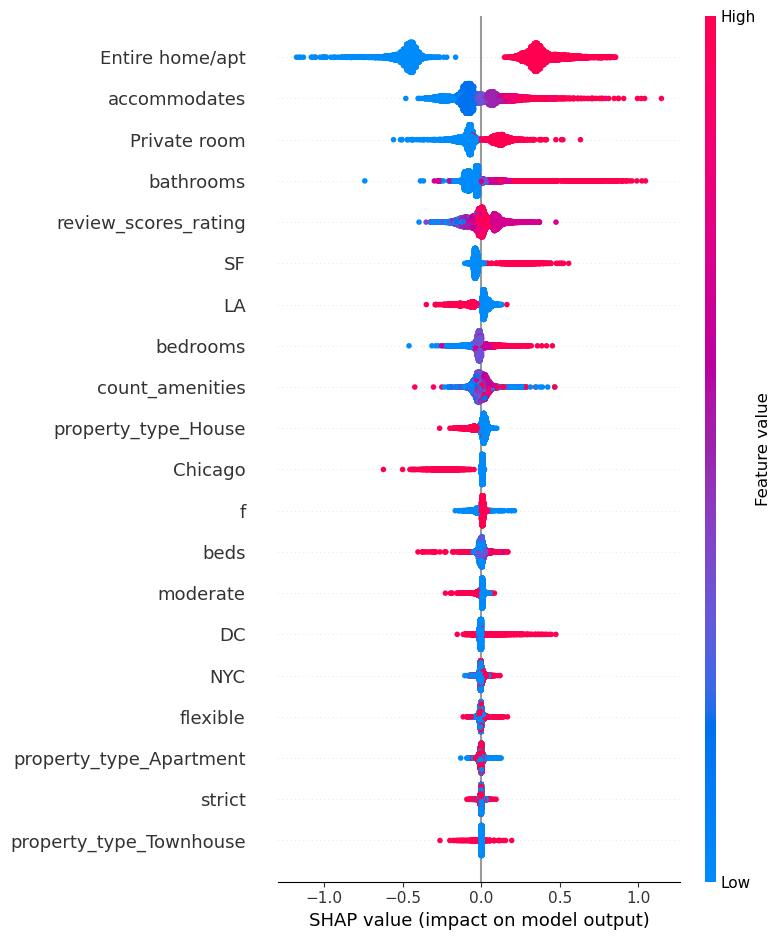

In [268]:
shap.summary_plot(shap_values, X_test)

END OF ANALYSIS